## Initial Dataset Creation
This notebook takes in initial datasets and combines them to form a working dataset that includes all necessary information.
- actions dataset has protein and chemical binding pairs
- protein_chemical has experimental scores (based on binding affinity) for all possible protein chemical pairs

Final result is a dataset with unique protein-chemical binding pairs and their binding affinity scores

In [3]:
import pandas as pd

In [4]:
actions = pd.read_table('9606.actions.v5.0.tsv.gz')
# reads in file as pandas dataframe

In [5]:
actions.head(5)
# shows first five rows

,item_id_a,item_id_b,mode,action,a_is_acting,score
0,9606.ENSP00000170630,CIDm00010461,expression,NaN,f,150
1,CIDm00010461,9606.ENSP00000170630,expression,NaN,t,150
2,9606.ENSP00000353915,CIDs23627457,binding,NaN,f,191
3,CIDs23627457,9606.ENSP00000353915,binding,NaN,f,191
4,9606.ENSP00000256906,CIDs44408029,binding,NaN,f,521


In [6]:
len(actions)
# returns number of rows - in this case, the number of protein-chemical pairs
# note: actions has duplicate pairs so actual number should be half

21773491

In [7]:
protchem = pd.read_table('9606.protein_chemical.links.detailed.v5.0.tsv.gz')

In [87]:
protchem.head(5)

,chemical,protein,experimental,prediction,database,textmining,combined_score
0,CIDm91758680,9606.ENSP00000257254,0,0,0,278,279
1,CIDm91758680,9606.ENSP00000302120,0,0,0,154,154
2,CIDm91758408,9606.ENSP00000006777,0,0,0,225,225
3,CIDm91758408,9606.ENSP00000056217,0,0,0,178,178
4,CIDm91758408,9606.ENSP00000216085,0,0,0,225,225


In [88]:
len(protchem)

15473939

In [8]:
actions_binding = actions[actions['mode'].str.match('binding')]
# takes only the rows that have 'binding' in the 'mode' column
# actions_binding contains only the pairs that are binding (still duplicates)

In [9]:
len(actions_binding)
# checks to make sure this number is less than original 21 mil

17763861

In [10]:
actions_binding.head(10)
# visual check

,item_id_a,item_id_b,mode,action,a_is_acting,score
2,9606.ENSP00000353915,CIDs23627457,binding,NaN,f,191
3,CIDs23627457,9606.ENSP00000353915,binding,NaN,f,191
4,9606.ENSP00000256906,CIDs44408029,binding,NaN,f,521
5,CIDs44408029,9606.ENSP00000256906,binding,NaN,f,521
8,9606.ENSP00000267377,CIDs23590374,binding,NaN,f,159
9,CIDs23590374,9606.ENSP00000267377,binding,NaN,f,159
12,9606.ENSP00000295589,CIDs73351473,binding,NaN,f,407
13,CIDs73351473,9606.ENSP00000295589,binding,NaN,f,407
16,9606.ENSP00000336630,CIDs10666045,binding,NaN,f,209
17,CIDs10666045,9606.ENSP00000336630,binding,NaN,f,209


In [11]:
actions_binding = actions_binding.drop(['mode', 'action', 'a_is_acting', 'score'],axis=1)
# only need protein and chemical so this removes other columns

In [12]:
actions_binding.head(3)

,item_id_a,item_id_b
2,9606.ENSP00000353915,CIDs23627457
3,CIDs23627457,9606.ENSP00000353915
4,9606.ENSP00000256906,CIDs44408029


In [13]:
actions_binding.values.sort()
# sorts each row (default sorts the rows)  

In [14]:
actions_binding
# visual check to see that each column has one kind of value (all protein/chemical) 

,item_id_a,item_id_b
2,9606.ENSP00000353915,CIDs23627457
3,9606.ENSP00000353915,CIDs23627457
4,9606.ENSP00000256906,CIDs44408029
5,9606.ENSP00000256906,CIDs44408029
8,9606.ENSP00000267377,CIDs23590374
9,9606.ENSP00000267377,CIDs23590374
12,9606.ENSP00000295589,CIDs73351473
13,9606.ENSP00000295589,CIDs73351473
16,9606.ENSP00000336630,CIDs10666045
17,9606.ENSP00000336630,CIDs10666045


In [15]:
testorder = actions_binding['item_id_b'].str.contains('9606.ENSP')
# tests to see if any rows have a switched order
# returns Boolean series with True for rows that are switched

In [16]:
any(testorder)
# checks to see if any True values appear in series
# result: no rows are switched

False

In [17]:
actions_binding = actions_binding.drop_duplicates() 
# drops duplicates

In [18]:
len(actions_binding)
# this is ~ half the 17 mil binding pairs (not exact because some pairs only appeared once)  

8877688

In [19]:
testdup = actions_binding.duplicated()
# returns Boolean series where True indicates the row is a duplicate of another row

In [20]:
any(testdup)
# tells us if any True values exist in the series (False indicates no True values were found)
# result: all duplicates were successfully removed

False

In [21]:
actions_binding = actions_binding.iloc[:, ::-1]
# iloc indexer reverses order of sequence of columns
# : takes all the rows, and ::-1 steps backwards through the columns

actions_binding.columns = ['chemical', 'protein']
# renames columns

In [22]:
actions_binding.head(3)
# visual check

,chemical,protein
2,CIDs23627457,9606.ENSP00000353915
4,CIDs44408029,9606.ENSP00000256906
8,CIDs23590374,9606.ENSP00000267377


In [23]:
protchem_binding = pd.merge(actions_binding, protchem, on=['chemical', 'protein'])
# inner merge of actions_binding and protchem by looking at 'chemical' and 'protein' columns
# takes pairs that are in common between the two dataframes and merges columns

In [24]:
len(protchem_binding)
# indicates that ~100,000 pairs are in actions_binding but not in protchem
# this is fine because we only want the pairs that are in both

8778298

In [25]:
protchem_binding.head(3)

,chemical,protein,experimental,prediction,database,textmining,combined_score
0,CIDs23627457,9606.ENSP00000353915,191,0,0,0,191
1,CIDs44408029,9606.ENSP00000256906,521,0,0,0,521
2,CIDs23590374,9606.ENSP00000267377,159,170,0,0,282


In [115]:
protchem_binding.to_csv('protchem_binding.tsv', sep='\t')
actions_binding.to_csv('actions_binding.tsv', sep='\t') 

In [26]:
%matplotlib inline
# enables ipython to display matplotlib graphs

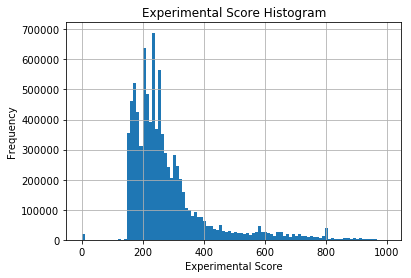

In [43]:
hist_plot = protchem_binding['experimental'].hist(bins=100)
hist_plot.set_title('Experimental Score Histogram')
hist_plot.set_xlabel('Experimental Score')
hist_plot.set_ylabel('Frequency')

In [30]:
protchem_experimental = protchem_binding['experimental'] 

In [31]:
protchem_experimental.head(5)

0    191
1    521
2    159
3    267
4    209
Name: experimental, dtype: int64

In [32]:
protchem_experimental = protchem_experimental[protchem_experimental !=0]

In [33]:
len(protchem_experimental) 

8759065

In [34]:
import numpy as np

In [35]:
protchem_experimental = np.log10(protchem_experimental) 
protchem_experimental

0          2.281033
1          2.716838
2          2.201397
3          2.426511
4          2.320146
5          2.359835
6          2.563481
7          2.318063
8          2.404834
9          2.220108
10         2.403121
11         2.378398
12         2.767898
13         2.946452
14         2.403121
15         2.359835
16         2.176091
17         2.561101
18         2.340444
19         2.181844
20         2.313867
21         2.220108
22         2.618048
23         2.344392
24         2.190332
25         2.897077
26         2.484300
27         2.501059
28         2.517196
29         2.309630
             ...   
8778268    2.230449
8778269    2.401401
8778270    2.220108
8778271    2.252853
8778272    2.313867
8778273    2.344392
8778274    2.557507
8778275    2.262451
8778276    2.227887
8778277    2.367356
8778278    2.684845
8778279    2.545307
8778280    2.682145
8778281    2.496930
8778282    2.523746
8778283    2.513218
8778284    2.201397
8778285    2.292256
8778286    2.204120


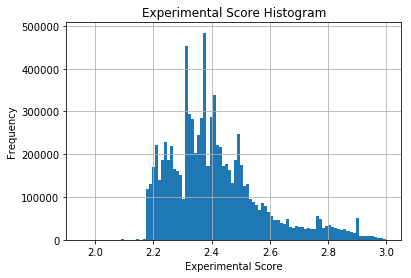

In [61]:
hist_plot = protchem_experimental.hist(bins=100)
hist_plot.set_title('Experimental Score Histogram')
hist_plot.set_xlabel('Experimental Score')
hist_plot.set_ylabel('Frequency')

In [42]:
protchem_experimental.describe()
# mean: 2.413
# median: 2.382
# right skew

count    8.759065e+06
mean     2.413283e+00
std      1.608865e-01
min      1.954243e+00
25%      2.309630e+00
50%      2.382017e+00
75%      2.489958e+00
max      2.999131e+00
Name: experimental, dtype: float64